# Mrk421 
## Análisis de serie de tiempo. Curva de Luz

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 14

### Gamma

In [4]:
#data = pd.read_table("../gamma/mrk421.dat", sep="\s+", comment='#')

### X-rays

In [5]:
data = pd.read_table("../x-rays/curve.dat", sep="\s+", comment='#', usecols=(0,3,4))

### Radio

In [6]:
#data = pd.read_table("../radio/mrk421.csv", sep=",", comment='#')

### Optical

In [7]:
#data = pd.read_table("../optical/optical.dat", sep="\s+", comment='#')

In [8]:
#data[ : , 0,3,4]
#data = data.dropna()  

In [9]:
data.columns = ['MJD', 'Flux', 'Err']

In [10]:
#ts.head()
#ts[58384.656539:58385.656551]
#ts["Flux"]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ffa9b9a7ed0>]],
      dtype=object)

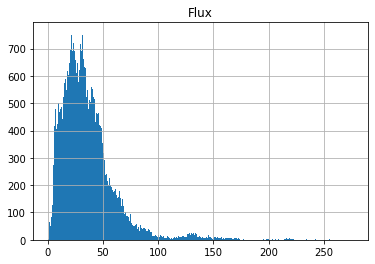

In [11]:
data.hist(bins=1430, column=['Flux'])

In [12]:
print("media=",  data.mean())
print("mínimo=", data.min())
print("máximo=", data.max())
print("desv. est.=", data.std())

media= MJD     56154.142711
Flux       36.296701
Err         2.424744
dtype: float64
mínimo= MJD     53430.050877
Flux        0.619304
Err         0.335479
dtype: float64
máximo= MJD     58940.201033
Flux      276.165500
Err       136.779500
dtype: float64
desv. est.= MJD     1517.886168
Flux      25.608037
Err        1.884345
dtype: float64


In [13]:
#ts.plot.hist()
data

,MJD,Flux,Err
0,57527.613541,21.20102,1.502913
1,57527.613656,20.62038,1.497702
2,57527.613772,19.65809,1.458409
3,57527.613888,21.07091,1.514538
4,57527.614003,22.67022,1.569825
...,...,...,...
160339,55290.002853,36.98873,4.098053
160340,58136.001526,264.12550,89.900540
160341,58136.002683,135.17450,8.068777
160342,56363.002783,26.53044,3.307412


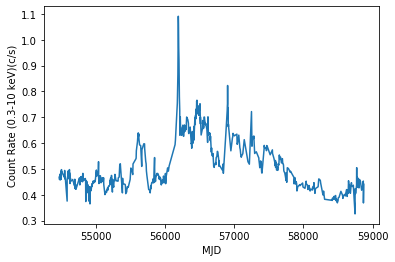

In [14]:
plt.plotfile('../winfunct/mrk421_radio.dat', delimiter=',', cols=(0, 1), 
             names=('MJD', 'Count Rate (0.3-10 keV)(c/s)'), marker='')
plt.show()

# Ajuste de curva

In [15]:
from scipy.optimize import curve_fit

In [16]:
ts = data["Flux"]

In [17]:
def seno(x, a, b):
    return a * np.sin(b * x)

In [18]:
indice = np.asarray(ts.index)   # conversión automática a fecha decimal
flujo = np.asarray(ts.data)

/home/wattie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Series.data is deprecated and will be removed in a future version
  


In [19]:
popt, pcov = curve_fit(seno, indice, flujo)
a,b = popt
print("Ajuste: %.5f * x + %.3f" % (a,b))

Ajuste: 0.01532 * x + 1.000


(160344,)

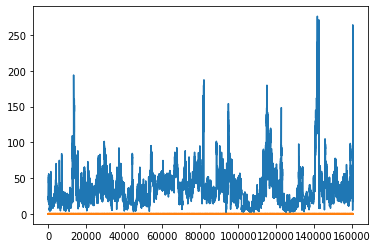

In [20]:
tendencia = seno(indice,a,b)   # evaluación automática sobre todos los elementos de fechas
plt.plot(indice,flujo)
plt.plot(indice,tendencia,lw=2)
tendencia.shape

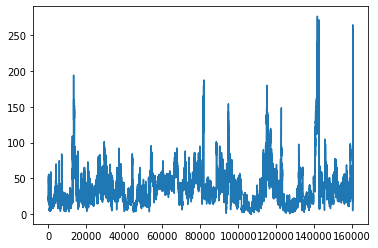

In [21]:
plt.plot(ts - tendencia)

# Aproximación a la tendencia: Media Móvil Simple

In [73]:
ts_SMA = ts.rolling(window=310).mean() #4127/100

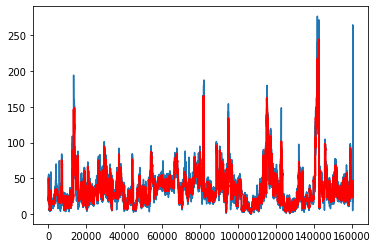

In [23]:
plt.plot(ts)
plt.plot(ts_SMA,"-",color="red",lw=2)

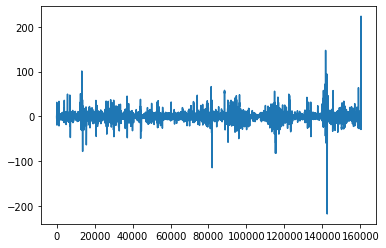

In [24]:
ts_dif = ts - ts_SMA
plt.plot(ts_dif)

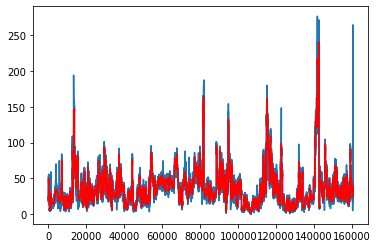

In [25]:
ts_SMA2 = ts.rolling(window=41).mean()
plt.plot(ts)
plt.plot(ts_SMA2,color="red")

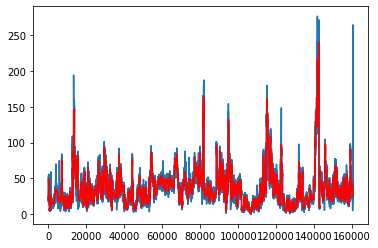

In [26]:
ts_SMA2 = ts.rolling(window=48).mean()
plt.plot(ts)
plt.plot(ts_SMA2,color="red")

# Seasonality

In [27]:
def seasonality(x, a, b, c, d):
    return a*np.cos(b*x + c) + d

In [28]:
ts_dif.dropna(inplace=True)
indice_dif = np.asarray(ts_dif.index)
flux_dif = np.asarray(ts_dif.data)

/home/wattie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Series.data is deprecated and will be removed in a future version
  This is separate from the ipykernel package so we can avoid doing imports until


In [29]:
popt, pcov = curve_fit(seasonality, indice_dif, flux_dif)
model = seasonality(indice, *popt)

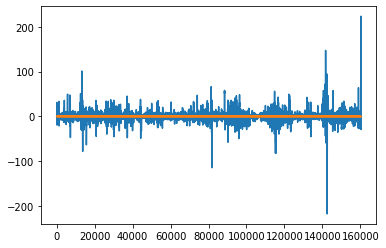

In [30]:
plt.plot(ts_dif)
plt.plot(indice, model)

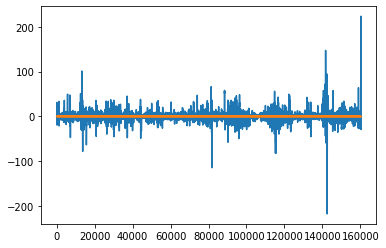

In [31]:
popt, pcov = curve_fit(seasonality, indice_dif, flux_dif, p0=(3,2*np.pi,0,0))
modelo_estaciones = seasonality(indice, *popt)
plt.plot(ts_dif)
plt.plot(indice, model)

# Modelo con ambas componentes

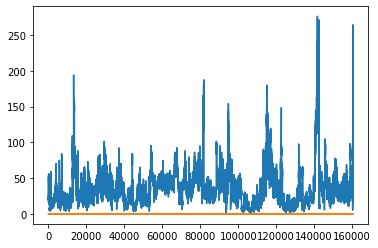

In [32]:
plt.plot(ts)
modelo = tendencia + model
plt.plot(indice,modelo)

# Promedio móvil exponencial

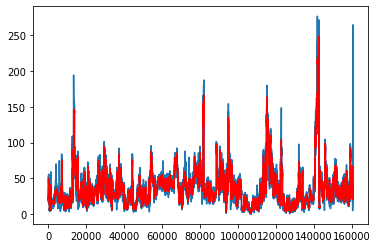

In [33]:
ts_EWM = ts.ewm(adjust=False,alpha=0.1).mean()
plt.plot(ts)
plt.plot(ts_EWM,color="red")

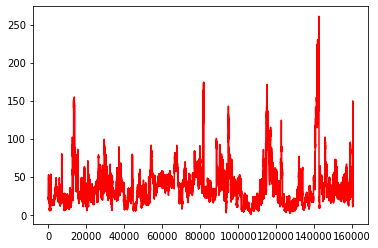

In [34]:
ts_EWM = ts.ewm(adjust=False,alpha=0.5).mean()
#plt.plot(ts)
plt.plot(ts_EWM,color="red")

# Autocorrelación

In [35]:
from statsmodels.tsa.stattools import acf, pacf 
ts_acf = acf(ts, nlags=100)

/home/wattie/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Autocorrelación')

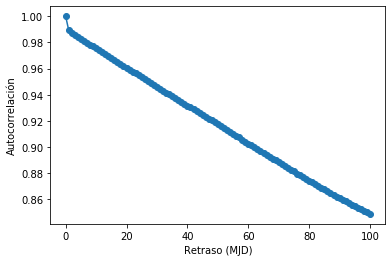

In [36]:
plt.plot(ts_acf,"o-")
ymin,ymax = plt.gca().get_ylim()
#plt.plot([24,24],[ymin,ymax],"--",color="black")
#plt.plot([48,48],[ymin,ymax],"--",color="black")
#plt.plot([72,72],[ymin,ymax],"--",color="black")
#plt.plot([96,96],[ymin,ymax],"--",color="black")
plt.xlabel("Retraso (MJD)")
plt.ylabel("Autocorrelación")

In [37]:
ts_pacf = pacf(ts, nlags=80, method='ols')

Text(0, 0.5, 'Autocorrelación')

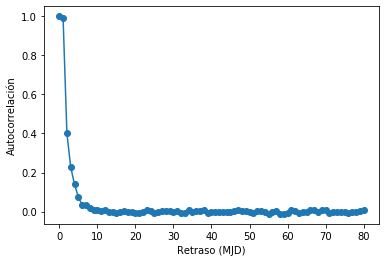

In [38]:
plt.plot(ts_pacf,"o-")
ymin,ymax = plt.gca().get_ylim()
#plt.plot([24,24],[ymin,ymax],"--",color="black")
#plt.plot([48,48],[ymin,ymax],"--",color="black")
#plt.plot([72,72],[ymin,ymax],"--",color="black")
plt.xlabel("Retraso (MJD)")
plt.ylabel("Autocorrelación")

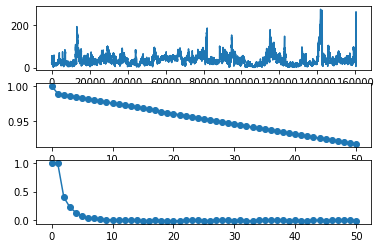

In [39]:
random_ts = ts
plt.subplot(311)
plt.plot(random_ts)
plt.subplot(312)
plt.plot(acf(random_ts,nlags=50),"o-")
plt.subplot(313)
plt.plot(pacf(random_ts,nlags=50),"o-")

# Probando la estacionariedad de la serie

### Verificar la estacionariedad <i>a ojo</i>: media y desviación estándar

Recordar de la definición de estacionareidad requiere que la serie tenga <b>media</b> y <b>varianza</b> (o desviación estándar) <i><b>constantes</b></i>.

Podemos calcular la media de la serie de tiempo con .mean():

In [40]:
ts.mean()

36.296701356183355

Pero esto nos da la media de <i>todos</i> los valores de la serie de tiempo. ¿Cómo saber si la media está cambiando con el tiempo?

La forma más simple es calcular una <b>media móvil</b>. En cada instante del tiempo, promediamos los valores circundantes de la serie de tiempo en una ventana de tiempo limitado.

Por ejemplo, podemos calcular una media móvil promediando sobre los 30 días alrededor de cada fecha:

In [41]:
mediamovil = ts.rolling(window=30,center=True).mean()

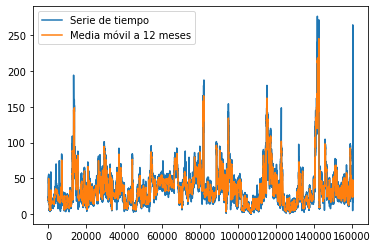

In [42]:
plt.plot(ts, label="Serie de tiempo")
plt.plot(mediamovil, label="Media móvil a 12 meses")
plt.legend(loc='best')

Vemos que la media <b>NO</b> es constante en el tiempo, por lo que la serie <b>no es estacionaria</b>.

Similarmente, podemos calcular la <b>desviación estándar móvil</b>, definida de la misma manera:

In [43]:
desvmovil = ts.rolling(window=30,center=True).std()

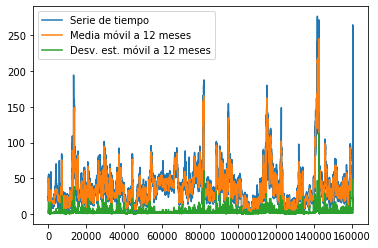

In [44]:
plt.plot(ts, label="Serie de tiempo")
plt.plot(mediamovil, label="Media móvil a 12 meses")
plt.plot(desvmovil, label="Desv. est. móvil a 12 meses")
plt.legend(loc='best')

La desviación estándar está mucho más cerca de ser constante, lo cual nos dice que la variabilidad de la serie no cambia mucho con el tiempo. Pero como la media sí, la serie no es estacionaria.

# Probando la estacionariedad de forma estadística: la prueba de Dickey-Fuller

La librería statsmodels contiene contiene la prueba estadística Dickey-Fuller de estacionariedad.
Definamos la siguiente función hacemos para hacer la prueba e imprimir los resultados automáticamente:

In [45]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    # Determinar estadísticas móviles
    rolmean = timeseries.rolling(window=12,center=True).mean()
    rolstd = timeseries.rolling(window=12,center=True).std()

    # Graficar estadísticas móviles
    orig = plt.plot(timeseries, color='blue',label='Serie de tiempo')
    mean = plt.plot(rolmean, color='red', label='Media móvil')
    std = plt.plot(rolstd, color='black', label = 'Desv. est. móvil')
    plt.legend(loc='best')
    plt.title('Serie de tiempo con media y desv. est. móviles')
    plt.show(block=False)
    
    # Realizar prueba Dicket-Fuller
    dftest = adfuller(timeseries, autolag='AIC')
    tstat = dftest[0]; pvalue = dftest[1]; cvalues = dftest[4]
    print('Resultado de la prueba Dickey-Fuller')
    print("------------------")
    print("Estadística de prueba\t",tstat)
    print("p-value\t\t\t",pvalue)
    print("------------------")
    print("Valores críticos (la estadística de prueba debe ser MENOR)")
    for clevel in [10,5,1]:
        conf = 100-clevel
        cval = cvalues['%i%%' % clevel]
        if tstat < cval:
            comp = ">"
            verdict = "PASA"
        else:
            comp = "<"
            verdict = "FALLA"        
        print("Confianza %i%%\t\t%f %s %f ... %s" % (conf, cval, comp, tstat, verdict))

Apliquemos la prueba a nuestra serie de tiempo:

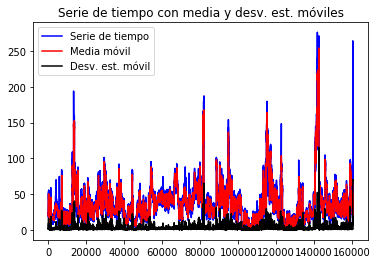

Resultado de la prueba Dickey-Fuller
------------------
Estadística de prueba	 -11.0748878789337
p-value			 4.458110697050962e-20
------------------
Valores críticos (la estadística de prueba debe ser MENOR)
Confianza 90%		-2.566780 > -11.074888 ... PASA
Confianza 95%		-2.861558 > -11.074888 ... PASA
Confianza 99%		-3.430391 > -11.074888 ... PASA


In [46]:
test_stationarity(ts)

Vemos que la estadística de prueba es <b>mayor</b> que todos los valores críticos, por lo que <b>no podemos rechazar</b> la hipótesis nula de no-estacionariedad. La prueba de Dickey-Fuller nos confirma lo que sospechábamos.

# Haciendo que la serie de tiempo sea estacionaria

La idea es que para modelar la serie de tiempo necesitamos primero hacerla estacionaria. Sólo entonces podremos usar alguno de los modelos de procesos estocásticos que hemos visto.

## Estimando y eliminando la tendencia


Antes de extraer la tendencia vamos a transformar la serie de tiempo para reducir la amplitud de su variabilidad. Esto es opcional, pero usualmente ayuda a la extracción de la tendencia.

Una forma común de hacer esto es tomar el <b>logaritmo</b> de la serie de tiempo:

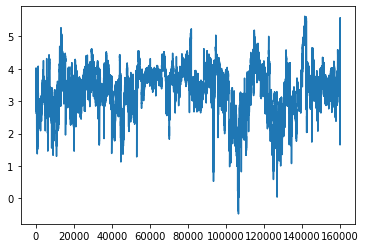

In [47]:
ts_log = np.log(ts)
plt.plot(ts_log)

Notar que mientras antes los valores de la serie estaban en los cientos, ahora son menores que 6.5.

# Suavizando para encontrar la tendencia

## Promediado móvil

La media móvil sirve no solamente para determinar la estacionariedad de la serie, sino también como una estimación simple de su tendencia.

Esta vez tomamos la media móvil con los <i>últimos</i> 12 valores (meses):

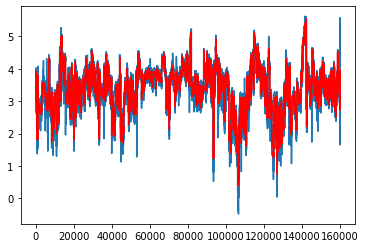

In [48]:
moving_avg = ts_log.rolling(window=12,center=False).mean()
plt.plot(ts_log)
plt.plot(moving_avg, color='red')

Tomemos ahora la <b>diferencia</b> entre la serie y su promedio móvil:

In [49]:
ts_log_moving_avg_diff = ts_log - moving_avg

Nótese que no podemos calcular el promedio móvil para los primeros 11 valores, pues necesitamos promediar sobre 12 meses.

Esto se puede ver imprimiendo los primeros 12 valores de lo que hemos obtenido, y constatando que los primeros 11 son NaN (Not a Number):

In [50]:
ts_log_moving_avg_diff.head(30)

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
5          NaN
6          NaN
7          NaN
8          NaN
9          NaN
10         NaN
11   -0.028082
12   -0.023743
13    0.069298
14    0.083428
15   -0.004680
16   -0.043645
17   -0.061174
18   -0.080622
19   -0.023146
20    0.114639
21    0.050918
22    0.081467
23   -0.098596
24   -0.027569
25    0.027949
26   -0.007391
27    0.091450
28   -0.089175
29   -0.050704
Name: Flux, dtype: float64

Para quitarlos, Pandas tiene la función dropna(), la cual elimina los NaNs:

In [51]:
ts_log_moving_avg_diff.dropna(inplace=True)
ts_log_moving_avg_diff.head()

11   -0.028082
12   -0.023743
13    0.069298
14    0.083428
15   -0.004680
Name: Flux, dtype: float64

Podemos ahora sí ver si esto ha mejorado la estacionariedad de la serie:

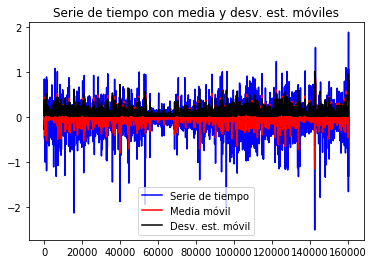

Resultado de la prueba Dickey-Fuller
------------------
Estadística de prueba	 -84.83472888504227
p-value			 0.0
------------------
Valores críticos (la estadística de prueba debe ser MENOR)
Confianza 90%		-2.566780 > -84.834729 ... PASA
Confianza 95%		-2.861558 > -84.834729 ... PASA
Confianza 99%		-3.430391 > -84.834729 ... PASA


In [52]:
test_stationarity(ts_log_moving_avg_diff)

Vemos que ahora la serie <b>pasa</b> la prueba de estacionariedad a un nivel de confianza de 95%.

# Capturando la tendencia y periodicidades (i.e. "estacionalidad")

Aunque hemos capturado bien la tendencia de la serie, aún queda claro que tiene variaciones periódicas ("estacionales", como las estaciones del año ... en este caso de hecho sí son estaciones, pero el término se usa de forma genérica).

Una manera popular de capturar la tendencia en la presencia de periodicidades de mediano o largo plazo es <b>diferenciando</b> la serie, es decir, tomando la aproximación discreta de su derivada.

La forma más sencilla de hacer esto es simplemente restar la serie movida en 1:

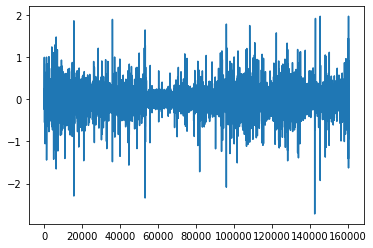

In [53]:
ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff)

Descartando el primer valor (pues no tiene valor anterior), y corriendo la prueba de estacionariedad:

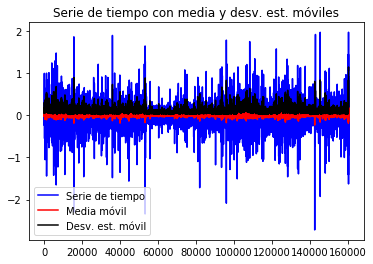

Resultado de la prueba Dickey-Fuller
------------------
Estadística de prueba	 -127.51836433149033
p-value			 0.0
------------------
Valores críticos (la estadística de prueba debe ser MENOR)
Confianza 90%		-2.566780 > -127.518364 ... PASA
Confianza 95%		-2.861558 > -127.518364 ... PASA
Confianza 99%		-3.430391 > -127.518364 ... PASA


In [54]:
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

Esto pasa la prueba a 90% de confianza, aunque no es mejor que nuestro intento anterior.

# Descomposición de la serie en tendencia y estacionalidad

El siguiente paso es <b>descomponer</b> la serie identificando por separado la tendencia y la estacionalidad. Aunque eso se puede hacer de muchas formas, statsmodels incluye una herramienta para hacerlo automáticamente:

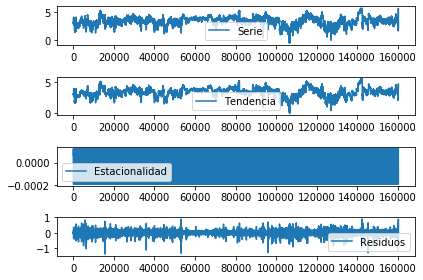

In [55]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log,freq=3)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log, label='Serie')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Tendencia')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Estacionalidad')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuos')
plt.legend(loc='best')
plt.tight_layout()

Si hacemos de nuevo la prueba de estacionariedad,

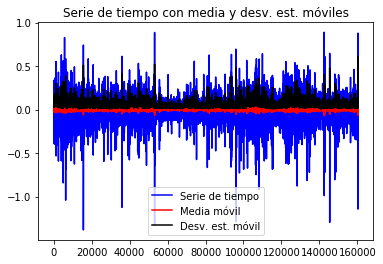

Resultado de la prueba Dickey-Fuller
------------------
Estadística de prueba	 -81.54777764761226
p-value			 0.0
------------------
Valores críticos (la estadística de prueba debe ser MENOR)
Confianza 90%		-2.566780 > -81.547778 ... PASA
Confianza 95%		-2.861558 > -81.547778 ... PASA
Confianza 99%		-3.430391 > -81.547778 ... PASA


In [56]:
ts_log_decompose = residual
ts_log_decompose.dropna(inplace=True)
test_stationarity(ts_log_decompose)

Vemos que esto es sustancialmente mejor, con la mejor estadística de prueba hasta el momento (ojo que la escala vertical es muy pequeña: la media y desv. est. son casi constantes):

# Correlograma

Habiendo forzado la serie a ser estacionaria, podemos ahora usar los modelos de procesos estocásticos para modelar su variabilidad, lo cual es lo que queda una vez sustraidas la tendencia y la estacionalidad.

Para esto usaremos el modelo general ARIMA (Auto-Regressive Integrated Moving Average) de statsmodel, el cual permite combinar los varios tipos de modelos estocásticos:

In [57]:
from statsmodels.tsa.arima_model import ARIMA

Un modelo ARIMA depende de tres parámetros:

$ARIMA(p,d,q)$

donde $p$ indica el orden de la componente autoregresiva, $d$ el orden de diferenciación y $q$ el orden de la componente de media móvil.

El valor de $d$ puede estimarse según el número de veces que se tiene que diferenciar la serie para obtener algo aproximadamente estacionario; en este caso, vimos que una diferenciación ($d=1$) bastaba.

Para estimar los valores de $p$ y $d$, calculamos las funciones de autocorrelación (ACF) y autocorrelación parcial (PACF) de la serie de tiempo. Statsmodel tiene herramientas para calcularlas.

# ACF & PACF Plots

A continuación se muestran las funciones de autocorrelación y autocorrelación parcial de la serie de tiempo (transformada y diferenciada, ya que esto da una serie casi estacionaria, como vimos).

La líneas punteadas indican los valores dentro de los cuales podemos decir que la autocorrelación es nula (comúnmente se escoge 95% de confianza, lo cual corresponde a 1.96 desviaciones estándares).

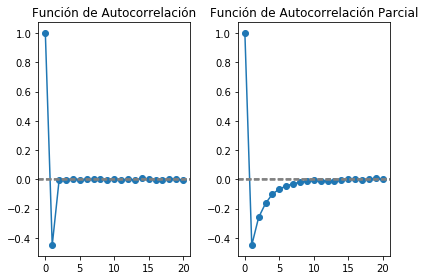

In [58]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf  

lag_acf = acf(ts_log_diff, nlags=20)
lag_pacf = pacf(ts_log_diff, nlags=20, method='ols')

#Plot ACF:    
plt.subplot(121)    
plt.plot(lag_acf,"-o")
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Función de Autocorrelación')

#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf,"-o")
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Función de Autocorrelación Parcial')
plt.tight_layout()

Usamos las gráficas para obtener los valores de $p$ y $q$ de la siguiente forma:
<ul>
<li>$q$ es el valor de retraso al cual la ACF cruza el límite de confianza superior, lo cual quiere decir que la correlación ha desaparecido. En este caso, $q=2$.</li>
<li>$p$ es el valor de retraso al cual la PACF cruza el límite de confianza superior, lo cual quiere decir que la correlación parcial ha desaparecido. En este caso, $p=2$.</li>
</ul>

Creemos ahora tres modelos diferentes: un modelo AR(2), uno MA(2) y su combinación.

# Modelo AR(p=2)

Denotaremos con RSS la suma de residuos cuadráticos entre el modelo y la serie.

Text(0.5, 1.0, 'RSS: 1684.2837')

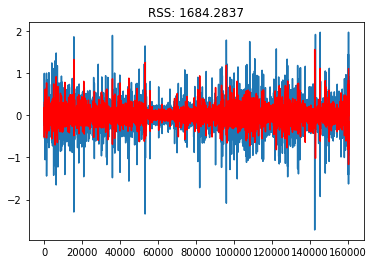

In [59]:
#MA model:
model = ARIMA(ts_log, order=(2, 1, 0))  
results_AR = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-ts_log_diff)**2))

# Modelo MA(q=2)

Text(0.5, 1.0, 'RSS: nan')

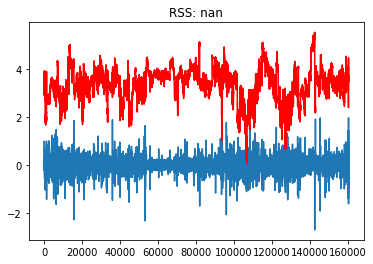

In [60]:
model = ARIMA(ts_log, order=(2, 0, 1))
results_MA = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-ts_log_diff)**2))

# Modelo combinado ARIMA

Finalmente, combinando los dos modelos:

Text(0.5, 1.0, 'RSS: 1608.5776')

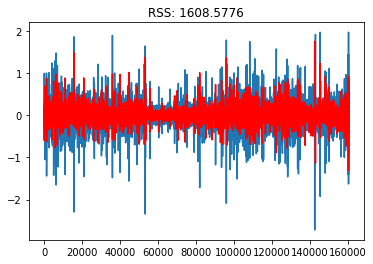

In [61]:
model = ARIMA(ts_log, order=(2, 1, 2))
results_ARIMA = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-ts_log_diff)**2))

Se ve que la suma de los modelos AR y MA produce algo más cercano al comportamiento estadístico de la serie.

# Revirtiendo el modelo a la escala original

Finalmente, revertimos a la escala original aplicando las transformaciones inversas-

Primero, acumulamos para revertir la diferenciación:

In [62]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()

Segundo, aplicamos el logaritmo inverso, i.e. la exponencial (además, agregamos de regreso el primer valor de la serie, el cual habíamos eliminado):

Text(0.5, 1.0, 'RMSE: 971.7524')

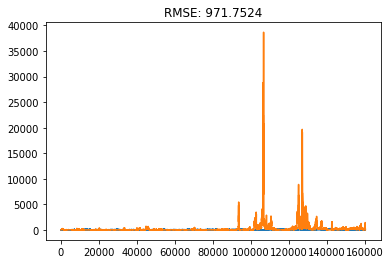

In [63]:
predictions_ARIMA_log = pd.Series(ts_log.iloc[0], index=ts_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(ts)
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-ts)**2)/len(ts)))

El modelo final quizás es sólo aproximado, pero el procedimiento ilustra cómo se calcula.

# Análisis de series de tiempo con la transformada de Fourier

# Parte 1: la transformada (discreta) de Fourier

Primero, creemos una serie de tiempo muy simple: un seno de amplitud 1 y periodo 1.

Como el coseno es una función continua, creamos una serie *muestreando* la función 1000 veces entre t=0 y t=10 (pensemos que son segundos):

In [64]:
from math import pi
from numpy.fft import fft, fftfreq, rfft, rfftfreq

Text(0, 0.5, 'Amplitud')

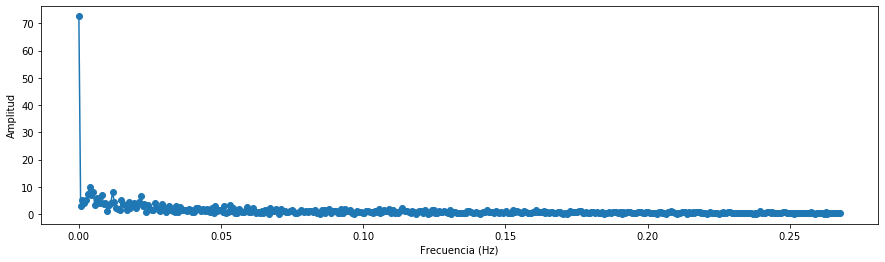

In [65]:
transf = np.abs(rfft(ts))/(len(ts)/2)
freqs = rfftfreq(len(ts),d=0.01)
plt.figure(figsize=(15,4))
plt.plot(freqs[0:430],transf[0:430],'o-')
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Amplitud")

El DFT reconoce limpiamente que la serie está compuesta por 3 componentes periódicas:
- Una componente lenta de frecuencia 0.2 Hz y amplitud 10
- Una componente rápida de frecuencia 2 Hz y amplitud 2
- Una componente muy rápida de frecuencia 5 Hz y amplitud 1

Si se revisa con cuidado la manera en que se definió la serie arriba, se verá que esto es exactamente correcto.

# Partes 2: Artefactos de la transformada de Fourier

Como herramienta matemática la transformada de Fourier tiene varios defectos que deben entenderse para poder interpretarla correctamente.

# Filtrado espectral

Si una periodicidad no completa un número entero de ciclos, esto ensancha artificialmente el pico en frecuencia correspondiente.

In [66]:
df = pd.DataFrame(ts)

Text(0, 0.5, 'Amplitud')

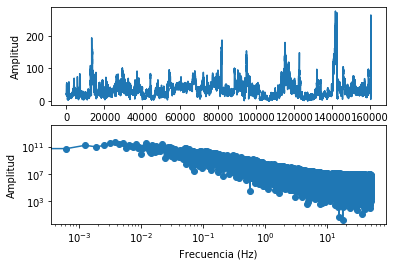

In [67]:
#data = data.dropna() plt.figure(figsize=(15,10))
plt.subplot(211)
plt.plot(ts,"-")
plt.xlabel("Tiempo (segundos)")
plt.ylabel("Amplitud")
psd = np.abs(rfft(df.Flux))**2
freqs = rfftfreq(len(df.Flux),d=0.01)
plt.subplot(212)
plt.loglog(freqs,psd,'o-')
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Amplitud")

# Transformada de Fourier ventaneada


Una forma de lidiar con series no-estacionarias es hacer el análisis en tiempo y frecuencia simultáneamente.

Una técnica sencilla es usar la **transformada de Fourier "ventaneada"** o **Short-Time-Fourier-Transform (STFT**): calculamos la transformada de Fourier en una ventana temporal pequeña la cual se va recorriendo sobre la serie. Con esto se puede capturar un contenido espectral que cambia con el tiempo.

La función scipy.signal.spectrogram() permite el cálculo automático de este tipo de transformada tiempo-frecuencia; la forma de la ventana se puede seleccionar mediante el argumento 'window'.

Hagamos esto con un chirp que aumenta de 1000 Hz a 5000 Hz en 10 segundos:

In [68]:
from scipy import signal

Text(0.5, 0, 'Tiempo (s)')

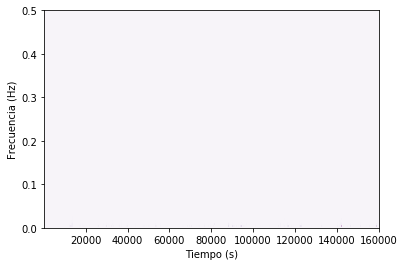

In [69]:
f, t, Sxx = signal.spectrogram(ts)
#plt.figure(figsize=(16,8))
plt.pcolormesh(t, f, Sxx, cmap="PuRd")
plt.ylabel('Frecuencia (Hz)')
plt.xlabel('Tiempo (s)')

# Transformada de wavelet

Otra herramienta relacionada de análisis de tiempo-frecuencia son las transformadas de **wavelets**.

Es una generalización de la transformada de Fourier: en lugar de usar funciones armónicas se usan “wavelets”: formas de onda arbitraria que pueden cambiar de escala temporal. Esto permite hacer una reconstrucción en tiempo-frecuencia con mejor resolución que la transformada de Fourier ventaneada (la wavelet es una ventana deformable).

En el siguiente ejemplo sumamos un coseno (primer panel) y un pulso gaussiano (segundo panel), y de la serie combinada (tercer panel) calculamos la transformada de wavelet (cuarto panel) usando signal.cwt.

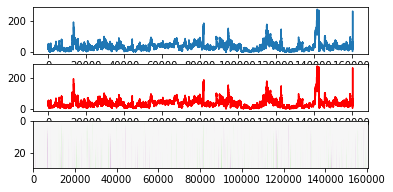

In [70]:
#t = np.linspace(-1, 1, 200, endpoint=False)
#sig1 = np.cos(2 * np.pi * 7 * t)
#sig2 = signal.gausspulse(t - 0.4, fc=2)
#sig3 = sig1 + sig2
widths = np.arange(1, 31)
cwtmatr = signal.cwt(df.Flux, signal.ricker, widths)



#plt.subplot(411)
#plt.plot(t,sig1)
plt.subplot(412)
plt.plot(df.Flux)
plt.subplot(413)

plt.plot(df.Flux,"r")
#plt.figure(figsize=(16,8))

plt.subplot(414)

plt.imshow(cwtmatr, cmap='PRGn', aspect='auto', vmax=abs(cwtmatr).max(), vmin=-abs(cwtmatr).max())


/home/wattie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  after removing the cwd from sys.path.


Text(0, 0.5, 'PSD')

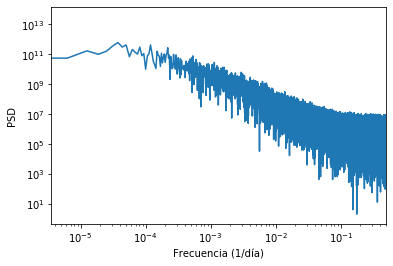

In [71]:
psd = np.abs(np.fft.rfft(df.Flux))**2
freqs = np.fft.rfftfreq(len(df.Flux))
plt.loglog(freqs,psd,'-')
plt.xlim(min(freqs), max(freqs))
plt.xlabel("Frecuencia (1/día)")
plt.ylabel("PSD")

Text(0, 0.5, 'PSD')

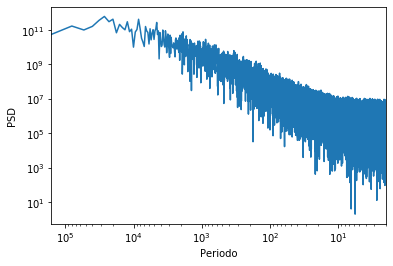

In [72]:
psd = np.abs(np.fft.rfft(df.Flux))**2
freqs = np.fft.rfftfreq(len(df.Flux))
psd = psd[1:]
freqs = freqs[1:]
periodos = 1/freqs#/365.25
plt.loglog(periodos, psd, '-')
#plt.axvline(11, linestyle="--", color="black")
plt.xlim(min(periodos), max(periodos))
plt.gca().invert_xaxis()
plt.xlabel("Periodo")
plt.ylabel("PSD")